In [1]:
import xarray as xr
#import scipy.interpolate as sci
#from resize import Resize
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from PIL import Image
import os
from dataloader_1 import *
import io

In [5]:
ds_hr = xr.open_dataset(r'CROWN_1.nc')
#ds.attrs['crs']='EPSG:4326'
ds_hr
#lon=x, lat=y
#so the precipitaion is represented as (time,x,y)

<xarray.Dataset> Size: 51MB
Dimensions:        (time: 8766, lon: 36, nv: 2, lat: 36)
Coordinates:
  * time           (time) datetime64[ns] 70kB 2000-01-01 ... 2023-12-31
  * lat            (lat) float32 144B 40.88 40.62 40.38 ... 32.62 32.38 32.12
  * lon            (lon) float32 144B 72.12 72.38 72.62 ... 80.38 80.62 80.88
Dimensions without coordinates: nv
Data variables:
    lon_bnds       (time, lon, nv) float32 3MB ...
    lat_bnds       (time, lat, nv) float32 3MB ...
    precipitation  (time, lon, lat) float32 45MB ...
Attributes: (12/37)
    datetime:                   2000-01-01
    Conventions:                CF-1.6
    title:                      NOAA Climate Data Record (CDR) of Precipitati...
    comment:                    Daily PERSIANN-CDR precipitation estimates fo...
    source:                     GRIDSAT-B1.2000.01.01.00.v02r01.nc,GRIDSAT-B1...
    Metadata_Conventions:       CF-1.6,Unidata Dataset Discovery v1.0, NOAA C...
    ...                         ...
    contributor_role:           PrincipalInvestigator, Professor, Author, Author
    cdr_program:                NOAA Climate Data Record Program
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:C00854
    product_version:            v01r01
    spatial_resolution:         0.25 degrees

In [3]:
(80-72)//0.1

79.0

In [4]:
(37-29)//0.1

79.0

In [5]:
ds2=xr.open_dataset(r'F:\TANISHQ\lr_0.25.nc')
ds2

<xarray.Dataset>
Dimensions:        (time: 4017, lat: 32, lon: 32, nv: 2)
Coordinates:
  * time           (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2023-12-31
  * lat            (lat) float32 36.88 36.62 36.38 36.12 ... 29.62 29.38 29.12
  * lon            (lon) float32 72.12 72.38 72.62 72.88 ... 79.38 79.62 79.88
Dimensions without coordinates: nv
Data variables:
    lon_bnds       (lon, nv) float32 ...
    lat_bnds       (lat, nv) float32 ...
    precipitation  (time, lon, lat) float32 ...
Attributes: (12/37)
    datetime:                   2013-01-01
    Conventions:                CF-1.6
    title:                      NOAA Climate Data Record (CDR) of Precipitati...
    comment:                    Daily PERSIANN-CDR precipitation estimates fo...
    source:                     missing_00,missing_03,missing_06,missing_09,m...
    Metadata_Conventions:       CF-1.6,Unidata Dataset Discovery v1.0, NOAA C...
    ...                         ...
    contributor_role:           PrincipalInvestigator, Professor, Author, Author
    cdr_program:                NOAA Climate Data Record Program
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:C00854
    product_version:            v01r01
    spatial_resolution:         0.25 degrees

In [6]:
print(len(ds2['lat'].values))
print(len(ds2['lon'].values))
print(len(ds_hr['lat'].values))
print(len(ds_hr['lon'].values))

32
32
80
80


In [7]:
from preporcessing import  interpolate
inetr=interpolate()
inter_data=inetr.interpolate_data(r'F:\TANISHQ\lr_0.25.nc',0.25,0.1)

Precipitation data shape: (4017, 32, 32)


In [8]:
inter_data.shape

(4017, 80, 80)

Raw data shape: (4017, 80, 80)
Raw data range: [nan, nan]
Raw data mean: nan
Raw data std: nan


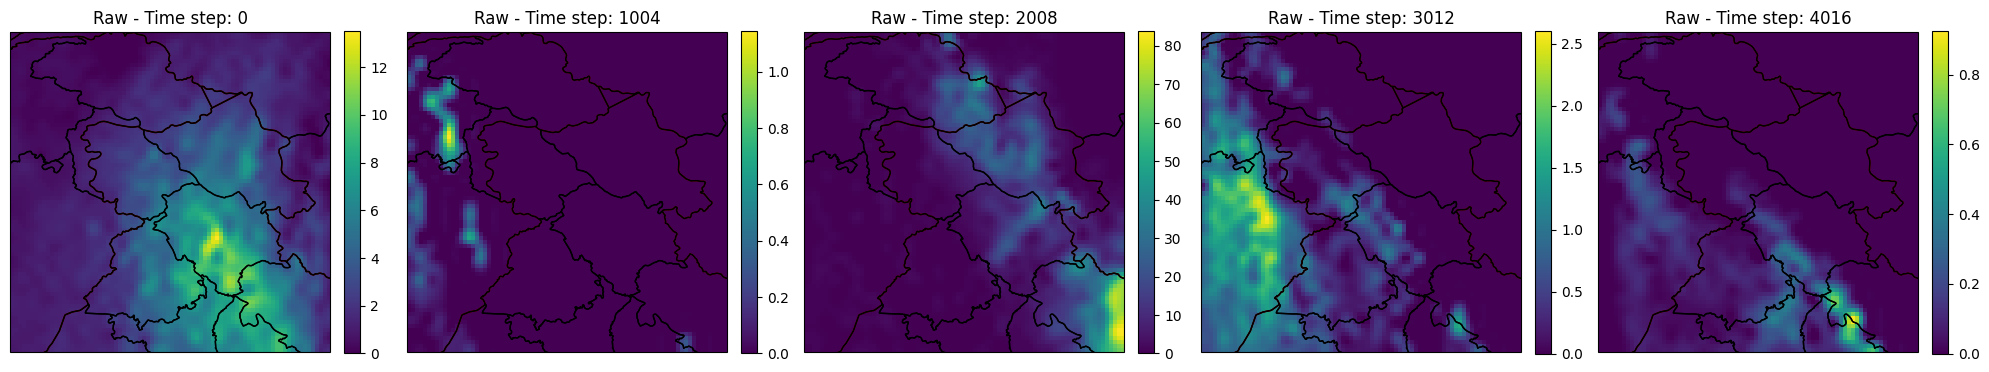

In [9]:
inetr.show_data_with_boundary(inter_data)

Raw data shape: (4017, 32, 32)
Raw data range: [nan, nan]
Raw data mean: nan
Raw data std: nan


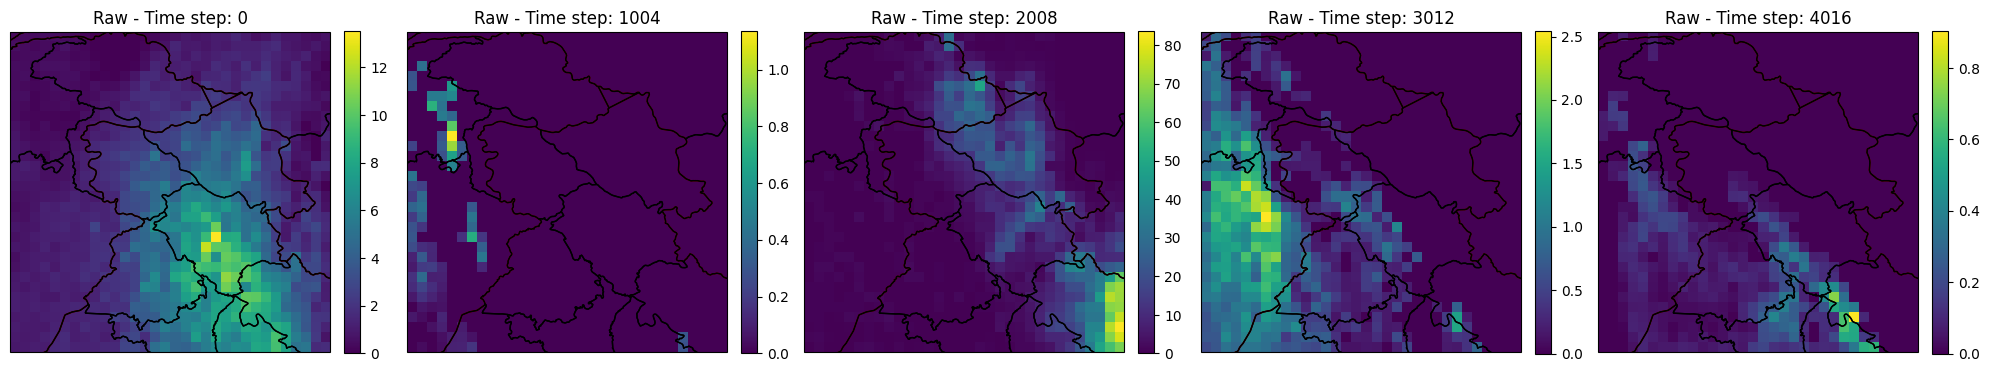

In [10]:
inetr.show_data_with_boundary(ds2['precipitation'].values)

Raw data shape: (3720, 80, 80)
Raw data range: [0.0, 479.69500732421875]
Raw data mean: 2.0655155181884766
Raw data std: 7.690197944641113


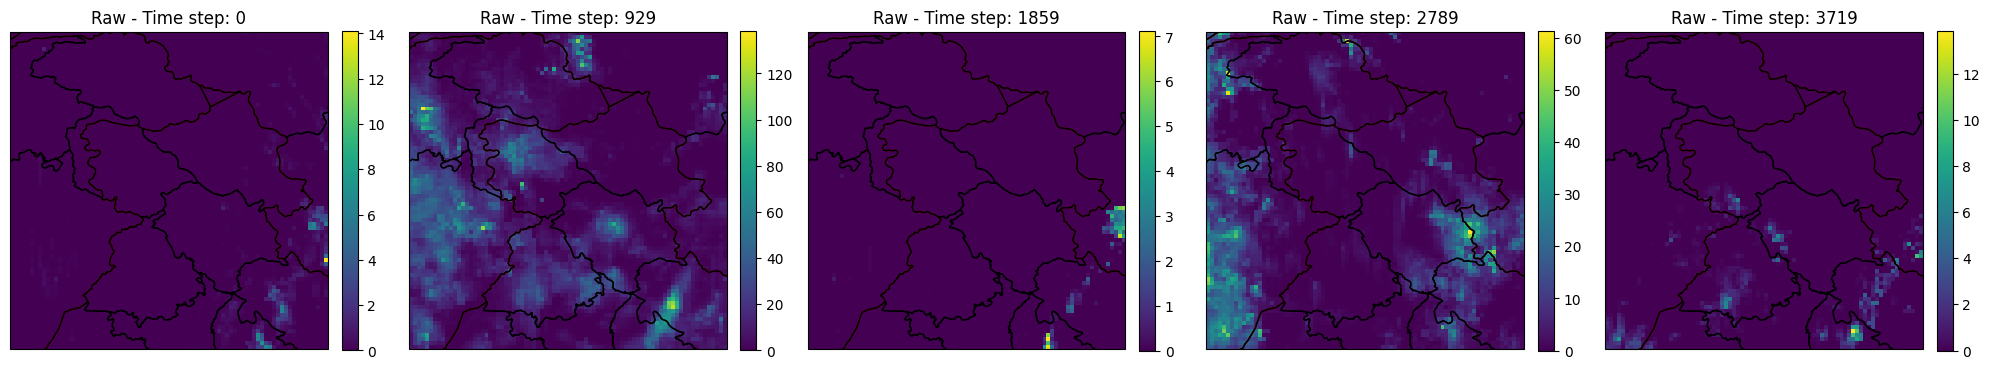

In [11]:
inetr.show_data_with_boundary(ds_hr['precipitation'].values)

In [12]:
#resampling both the lr and hr to 0.0625 gives the images of 128x128 dims
new_data=inetr.resample(r'F:\TANISHQ\lr_0.25.nc',old_res=0.25,new_res=0.0625)
other_data=inetr.resample(r'F:\TANISHQ\hr_0.1_GT.nc4',old_res=0.1,new_res=0.0625)

Precipitation data shape: (4017, 32, 32)
Precipitation data shape: (3720, 80, 80)


In [13]:
#lr hr pair, but the probelm might arise when we try to upsale hte lr image to match the hr image for training purposes.
#hr_img=inetr.resample(r'F:\TANISHQ\hr_0.1_GT.nc4',old_res=0.25,new_res=0.125) #upssampling to 160x160. - interpolate_data would have been used here.
hr_img=inetr.resample(r'F:\TANISHQ\hr_0.1_GT.nc4',old_res=0.1,new_res=0.05) #upssampling to 160x160. - interpolate_data would have been used here.
lr_image=inetr.resample(r'F:\TANISHQ\hr_0.1_GT.nc4',old_res=0.1,new_res=0.25) #downsampling to 40x40 - pooling method would have been used here.(the map coords are preserved)

Precipitation data shape: (3720, 80, 80)


Raw data shape: (3720, 40, 40)
Raw data range: [0.0, 335.5662536621094]
Raw data mean: 2.065514326095581
Raw data std: 7.4724016189575195


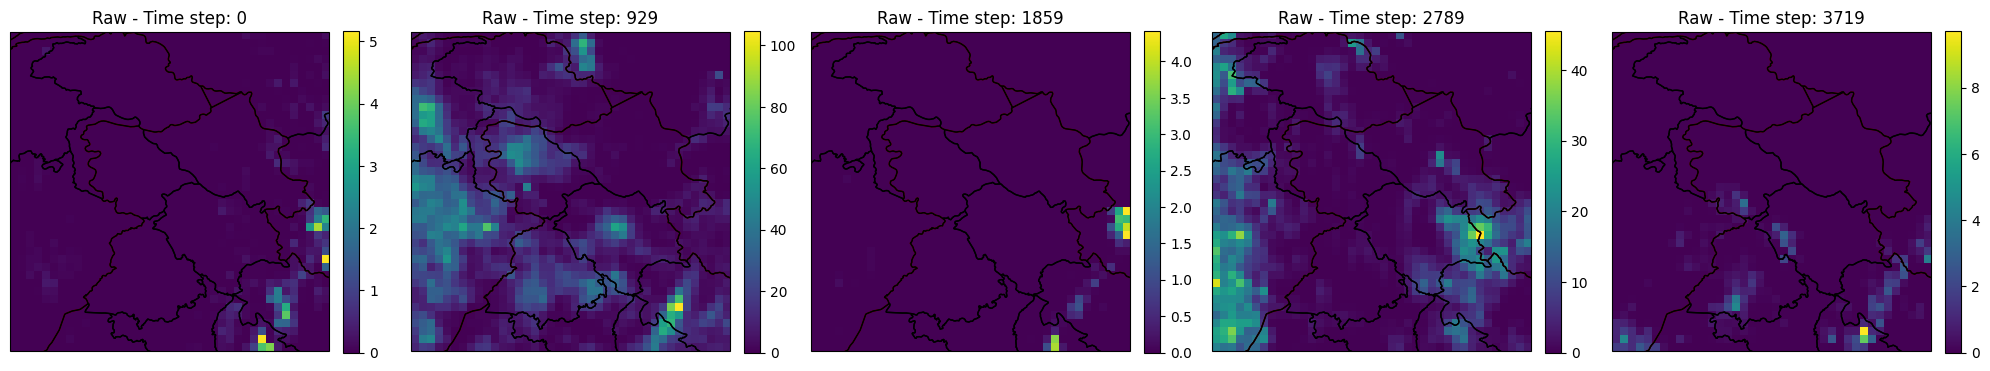

Raw data shape: (3720, 160, 160)
Raw data range: [0.0, 483.7738037109375]
Raw data mean: 2.068312883377075
Raw data std: 7.6451802253723145


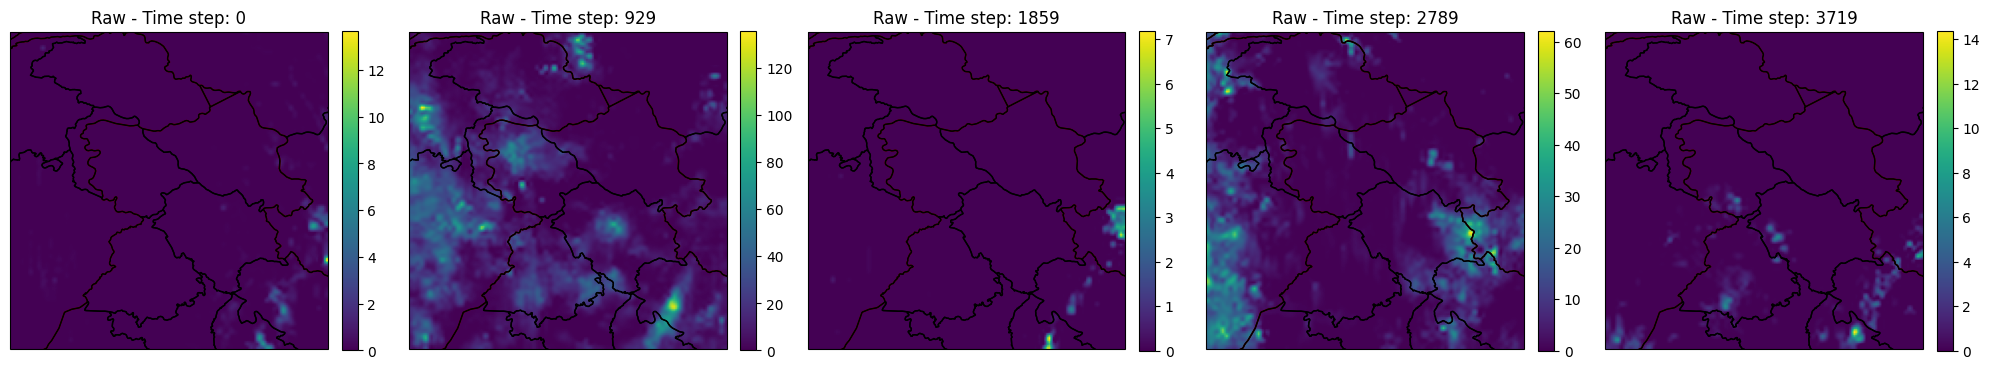

In [14]:
inetr.show_data_with_boundary(lr_image)
inetr.show_data_with_boundary(hr_img)

Raw data shape: (4017, 128, 128)
Raw data range: [nan, nan]
Raw data mean: nan
Raw data std: nan


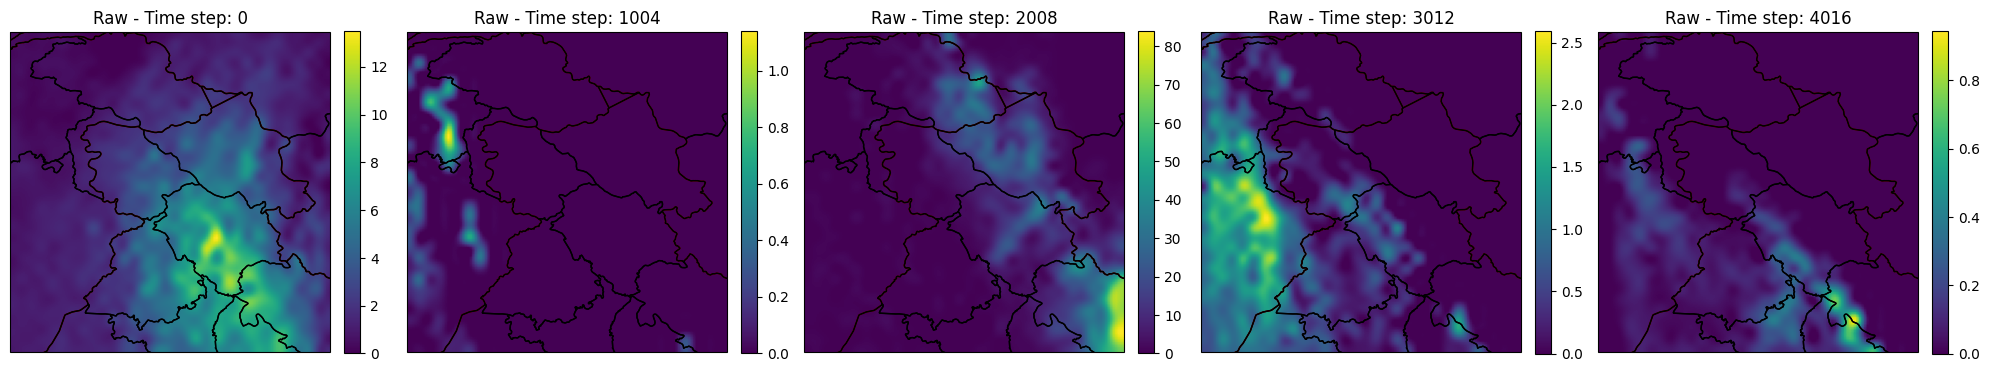

Raw data shape: (3720, 128, 128)
Raw data range: [0.0, 479.70318603515625]
Raw data mean: 2.068852186203003
Raw data std: 7.646714687347412


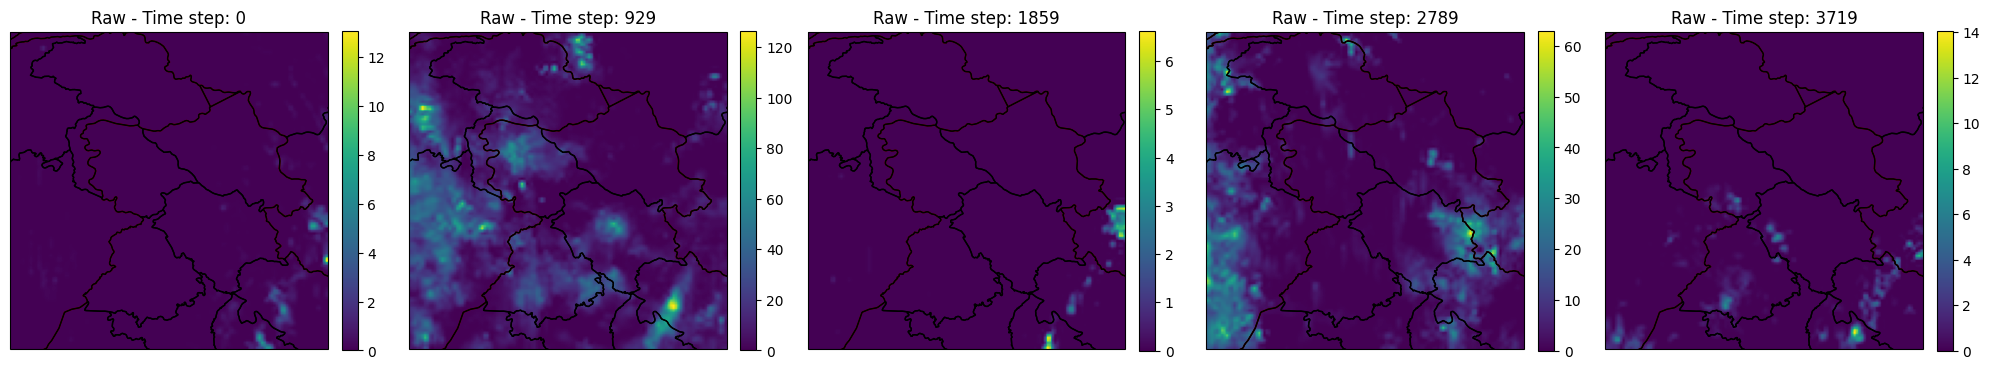

In [15]:
inetr.show_data_with_boundary(new_data)
inetr.show_data_with_boundary(other_data)

In [16]:
lr_img=inetr.make_image_from_data(lr_image)
hr_image=inetr.make_image_from_data(hr_img)

100%|██████████| 3720/3720 [00:08<00:00, 452.46it/s]


(160, 160)


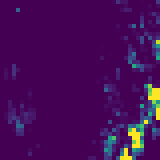

In [17]:
print(lr_img[0].resize((lr_img[0].width * 4, lr_img[0].height * 4), resample=Image.NEAREST).size)
lr_img[0].resize((lr_img[0].width * 4, lr_img[0].height * 4), resample=Image.NEAREST)

(160, 160)


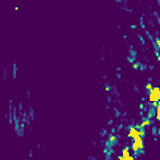

In [18]:
print(hr_image[0].size)
hr_image[0]

In [19]:
lr_img_resized = [x.resize((x.width * 4, x.height * 4), resample=Image.NEAREST) for x in lr_img]
lr_img=lr_img_resized

In [20]:
#saving the images 
lr_folder=r"F:\TANISHQ\lr_img_imerge"
hr_folder=r"F:\TANISHQ\hr_img_imerge"
if os.path.exists(lr_folder) and os.path.exists(hr_folder):
    print("FOLDERS ALREADY EXIST")
else:
    inetr.save_images(lr_img,r'F:\TANISHQ\lr_img_imerge')
    inetr.save_images(hr_image,r'F:\TANISHQ\hr_img_imerge')

FOLDERS ALREADY EXIST


#making the dataloader to perform leave on out cross validation
if __name__ == "__main__":
    # Example with directories
    #lr_input = images
    #hr_input = interpolated_images
    save_path = r"F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data"
    batch_size = 64
    tts_ratio = 0.85
    process_images(lr_img, hr_image, save_path, batch_size=batch_size, k_fold=True,loov=False, k=4, tts_ratio=tts_ratio)


#making the loov datasets
if __name__ == "__main__":
    # Example with directories
    #lr_input = images
    #hr_input = interpolated_images
    save_path = r"F:\TANISHQ\loov"
    batch_size = 64
    tts_ratio = 0.85
    process_images(r'F:\TANISHQ\lr_img_imerge', r'F:\TANISHQ\hr_img_imerge', save_path, batch_size=batch_size)


#making the dataloaders.
if __name__ == "__main__":
    # Example with directories
    #lr_input = images
    #hr_input = interpolated_images
    save_path = r"F:\TANISHQ\ML-hands-on\course_work\crown\data"
    batch_size = 64
    tts_ratio = 0.9

    train_loader, test_loader = process_images(lr_img, hr_image, save_path, batch_size=batch_size, tts_ratio=tts_ratio)


In [21]:
inetr.save_xarray(hr_img,r'F:\TANISHQ\hr_0.1_GT.nc4',r'dataloader_hr.nc',0.049376,0.1)
inetr.save_xarray(lr_image,r'F:\TANISHQ\hr_0.1_GT.nc4',r'dataloader_lr.nc',0.197,0.1)

Interpolated data saved to dataloader_hr.nc
Interpolated data saved to dataloader_lr.nc


In [22]:
#
#train=torch.load(r"F:\TANISHQ\ML-hands-on\course_work\crown\data\data_test.pth")

ds_new=xr.open_dataset(r'F:\TANISHQ\ML-hands-on\course_work\crown\processing\dataloader_hr.nc')
ds_new

<xarray.Dataset>
Dimensions:        (time: 3720, lat: 160, lon: 160)
Coordinates:
  * time           (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2023-03-09
  * lat            (lat) float64 24.05 24.1 24.15 24.2 ... 31.75 31.8 31.85 31.9
  * lon            (lon) float64 72.05 72.1 72.15 72.2 ... 79.75 79.8 79.85 79.9
Data variables:
    precipitation  (time, lat, lon) float32 ...

In [23]:
ds_lr=xr.open_dataset(r'F:\TANISHQ\ML-hands-on\course_work\crown\processing\dataloader_lr.nc')
ds_lr

<xarray.Dataset>
Dimensions:        (time: 3720, lat: 40, lon: 40)
Coordinates:
  * time           (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2023-03-09
  * lat            (lat) float64 24.05 24.25 24.44 24.64 ... 31.34 31.54 31.73
  * lon            (lon) float64 72.05 72.25 72.44 72.64 ... 79.34 79.54 79.73
Data variables:
    precipitation  (time, lat, lon) float32 ...

In [24]:
fold=torch.load(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data\fold_2.pth')

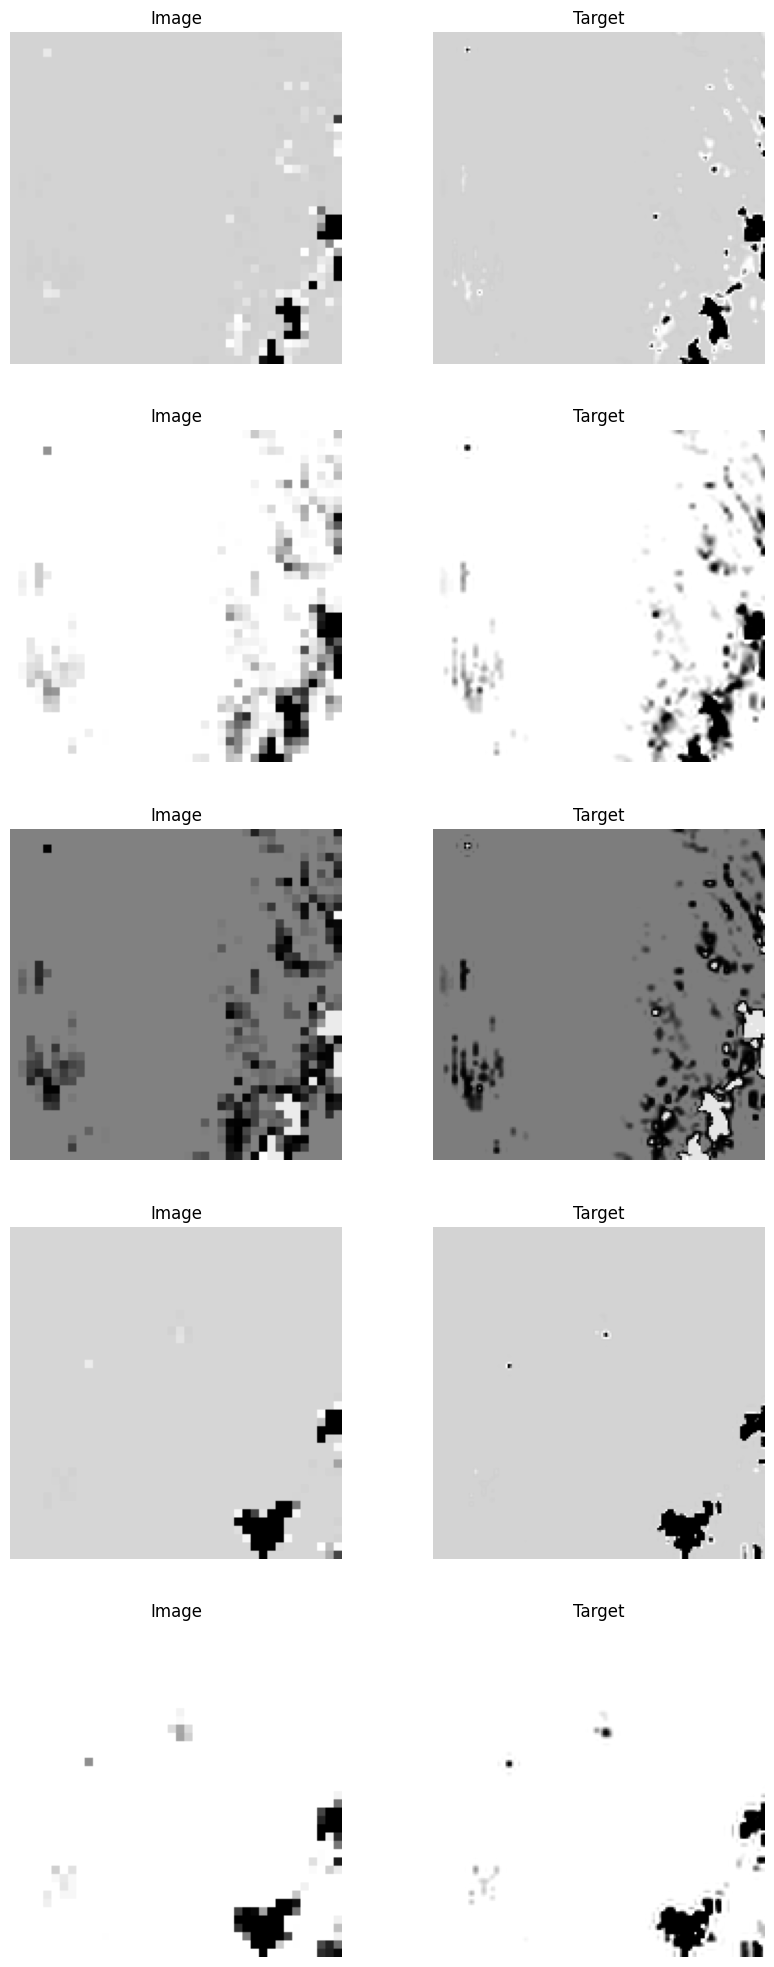

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def visualize_dataloader(filepath, num_images=5):
    """
    Visualizes images and their corresponding targets from a .pth file containing a DataLoader.
    
    Args:
        filepath (str): Path to the .pth file.
        num_images (int): Number of images to display.
    """
    try:
        # Load the DataLoader
        dataloader = torch.load(filepath)
        
        if dataloader is None:
            raise ValueError(f"Data loaded from {filepath} is missing required dataloader.")

        # Initialize figure
        fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))
        if num_images == 1:
            axes = [axes]  # Ensure axes is iterable
        elif num_images > 1:
            axes = axes.reshape(num_images, 2)  # Reshape to match (num_images, 2) layout

        images_shown = 0
        
        # Iterate through batches of images
        for batch in dataloader:
            if images_shown >= num_images:
                break
            
            # Assume the batch contains images and targets, e.g., (images, targets)
            images, targets = batch  # Unpack the batch
            
            # Handle already batched images
            if images.ndim == 5:  # Batched images (N, B, C, H, W)
                images = images.reshape(-1, *images.shape[2:])
            if targets.ndim == 5:  # Batched targets (N, B, C, H, W)
                targets = targets.reshape(-1, *targets.shape[2:])
            
            for i in range(min(num_images - images_shown, len(images))):
                image_tensor = images[i]
                target_tensor = targets[i]

                # Convert image tensor to NumPy array
                image_np = image_tensor.numpy()
                if image_np.ndim == 3 and image_np.shape[0] == 1:  # Grayscale image
                    image_np = image_np.squeeze(0)  # Remove the channel dimension
                elif image_np.ndim == 3 and image_np.shape[0] == 3:  # RGB image
                    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from CxHxW to HxWxC

                # Convert target tensor to NumPy array
                target_np = target_tensor.numpy()
                if target_np.ndim == 3 and target_np.shape[0] == 1:  # Grayscale target
                    target_np = target_np.squeeze(0)  # Remove the channel dimension
                elif target_np.ndim == 3 and target_np.shape[0] == 3:  # RGB target
                    target_np = np.transpose(target_np, (1, 2, 0))  # Convert from CxHxW to HxWxC

                # Normalize images if necessary (optional, depending on how data is stored)
                if image_np.max() > 1:
                    image_np = (image_np * 255).astype(np.uint8)
                if target_np.max() > 1:
                    target_np = (target_np * 255).astype(np.uint8)

                # Display the image and target using matplotlib
                axes[images_shown, 0].imshow(image_np, cmap='gray' if image_np.ndim == 2 else None)
                axes[images_shown, 0].axis('off')  # Hide axes
                axes[images_shown, 0].set_title('Image')

                axes[images_shown, 1].imshow(target_np, cmap='gray' if target_np.ndim == 2 else None)
                axes[images_shown, 1].axis('off')  # Hide axes
                axes[images_shown, 1].set_title('Target')
                
                images_shown += 1

        plt.show()
    
    except Exception as e:
        print(f"An error occurred while visualizing dataloader data: {e}")

# Example usage
visualize_dataloader(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\data_test.pth', num_images=5)

In [26]:
def visualize_fold_data(filepath, num_images=5):
    try:
        # Load the fold data
        fold_data = torch.load(filepath)
        
        if fold_data is None:
            raise ValueError(f"Data loaded from {filepath} is missing required fold data.")

        train_dataloader = DataLoader(fold_data['train_dataset'], batch_size=num_images, shuffle=False)
        test_dataloader = DataLoader(fold_data['test_dataset'], batch_size=num_images, shuffle=False)

        def display_images(dataloader, title):
            images_shown = 0
            for batch in dataloader:
                images, targets = batch
                fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))
                if num_images == 1:
                    axes = [axes]
                elif num_images > 1:
                    axes = axes.reshape(num_images, 2)
                
                for i in range(min(num_images, len(images))):
                    image_tensor = images[i]
                    target_tensor = targets[i]

                    image_np = image_tensor.numpy()
                    if image_np.ndim == 3 and image_np.shape[0] == 1:
                        image_np = image_np.squeeze(0)
                    elif image_np.ndim == 3 and image_np.shape[0] == 3:
                        image_np = np.transpose(image_np, (1, 2, 0))

                    target_np = target_tensor.numpy()
                    if target_np.ndim == 3 and target_np.shape[0] == 1:
                        target_np = target_np.squeeze(0)
                    elif target_np.ndim == 3 and target_np.shape[0] == 3:
                        target_np = np.transpose(target_np, (1, 2, 0))

                    if image_np.max() > 1:
                        image_np = (image_np * 255).astype(np.uint8)
                    if target_np.max() > 1:
                        target_np = (target_np * 255).astype(np.uint8)

                    axes[i, 0].imshow(image_np, cmap='gray' if image_np.ndim == 2 else None)
                    axes[i, 0].axis('off')
                    axes[i, 0].set_title('Image')

                    axes[i, 1].imshow(target_np, cmap='gray' if target_np.ndim == 2 else None)
                    axes[i, 1].axis('off')
                    axes[i, 1].set_title('Target')

                plt.suptitle(title)
                plt.show()
                images_shown += len(images)
                if images_shown >= num_images:
                    break

        display_images(train_dataloader, 'Training Data')
        display_images(test_dataloader, 'Testing Data')

    except Exception as e:
        print(f"An error occurred while visualizing fold data: {e}")


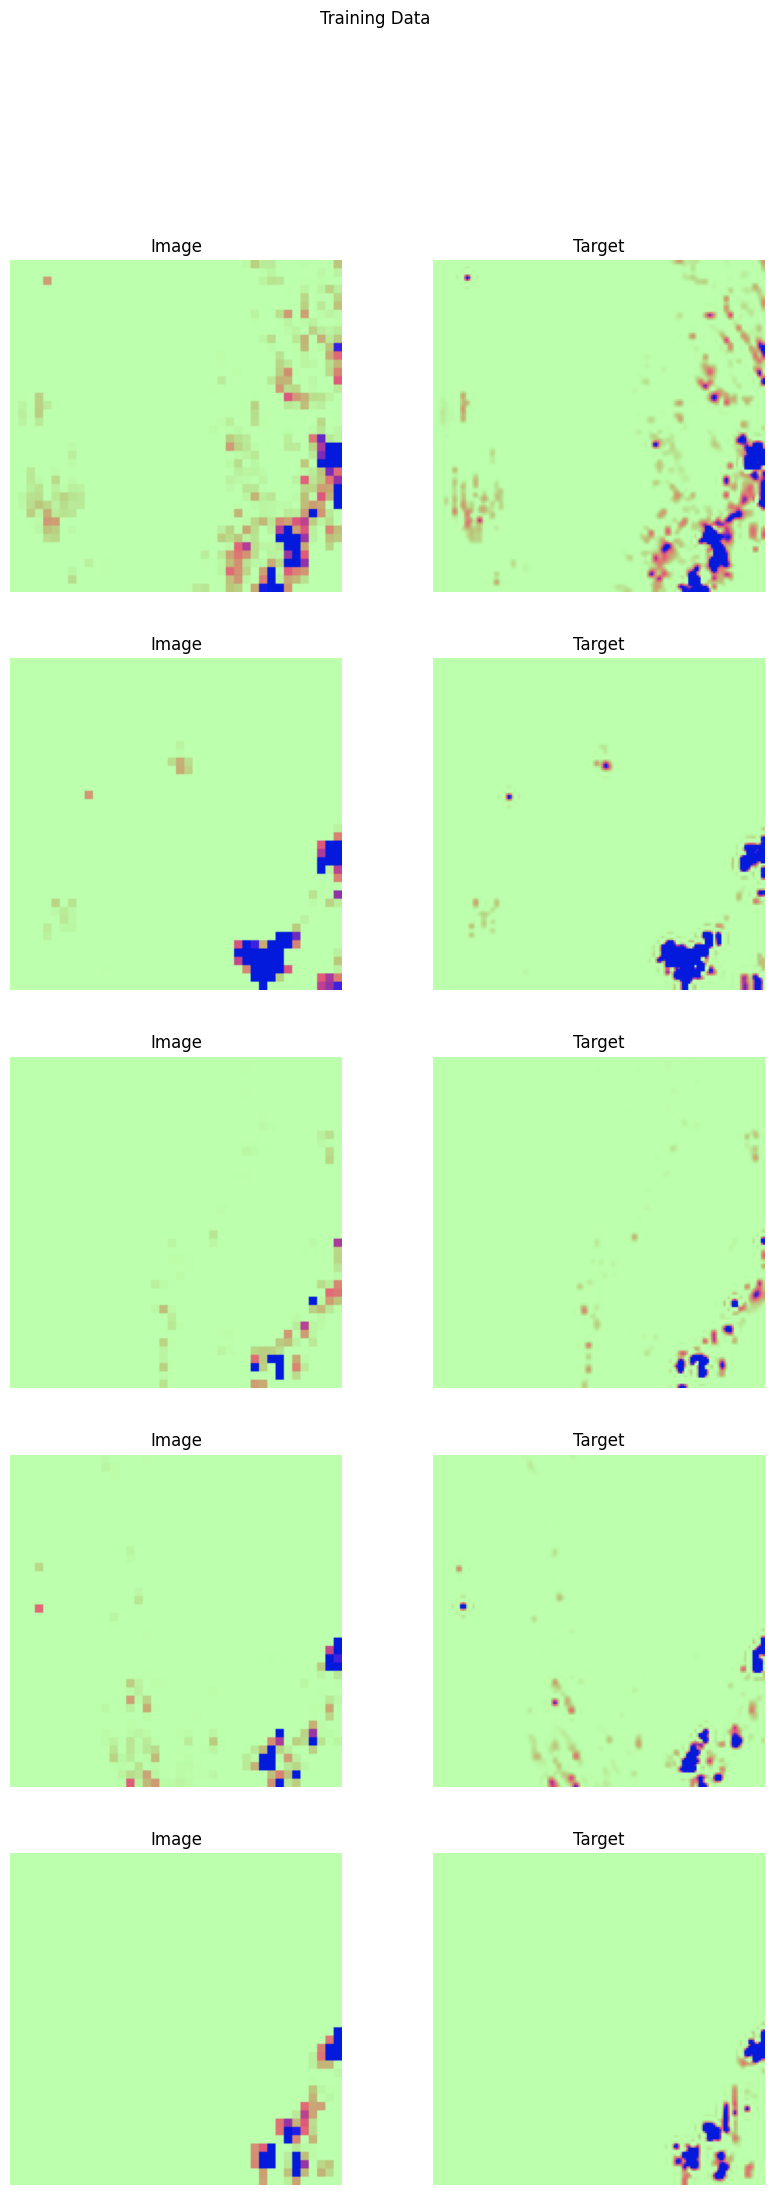

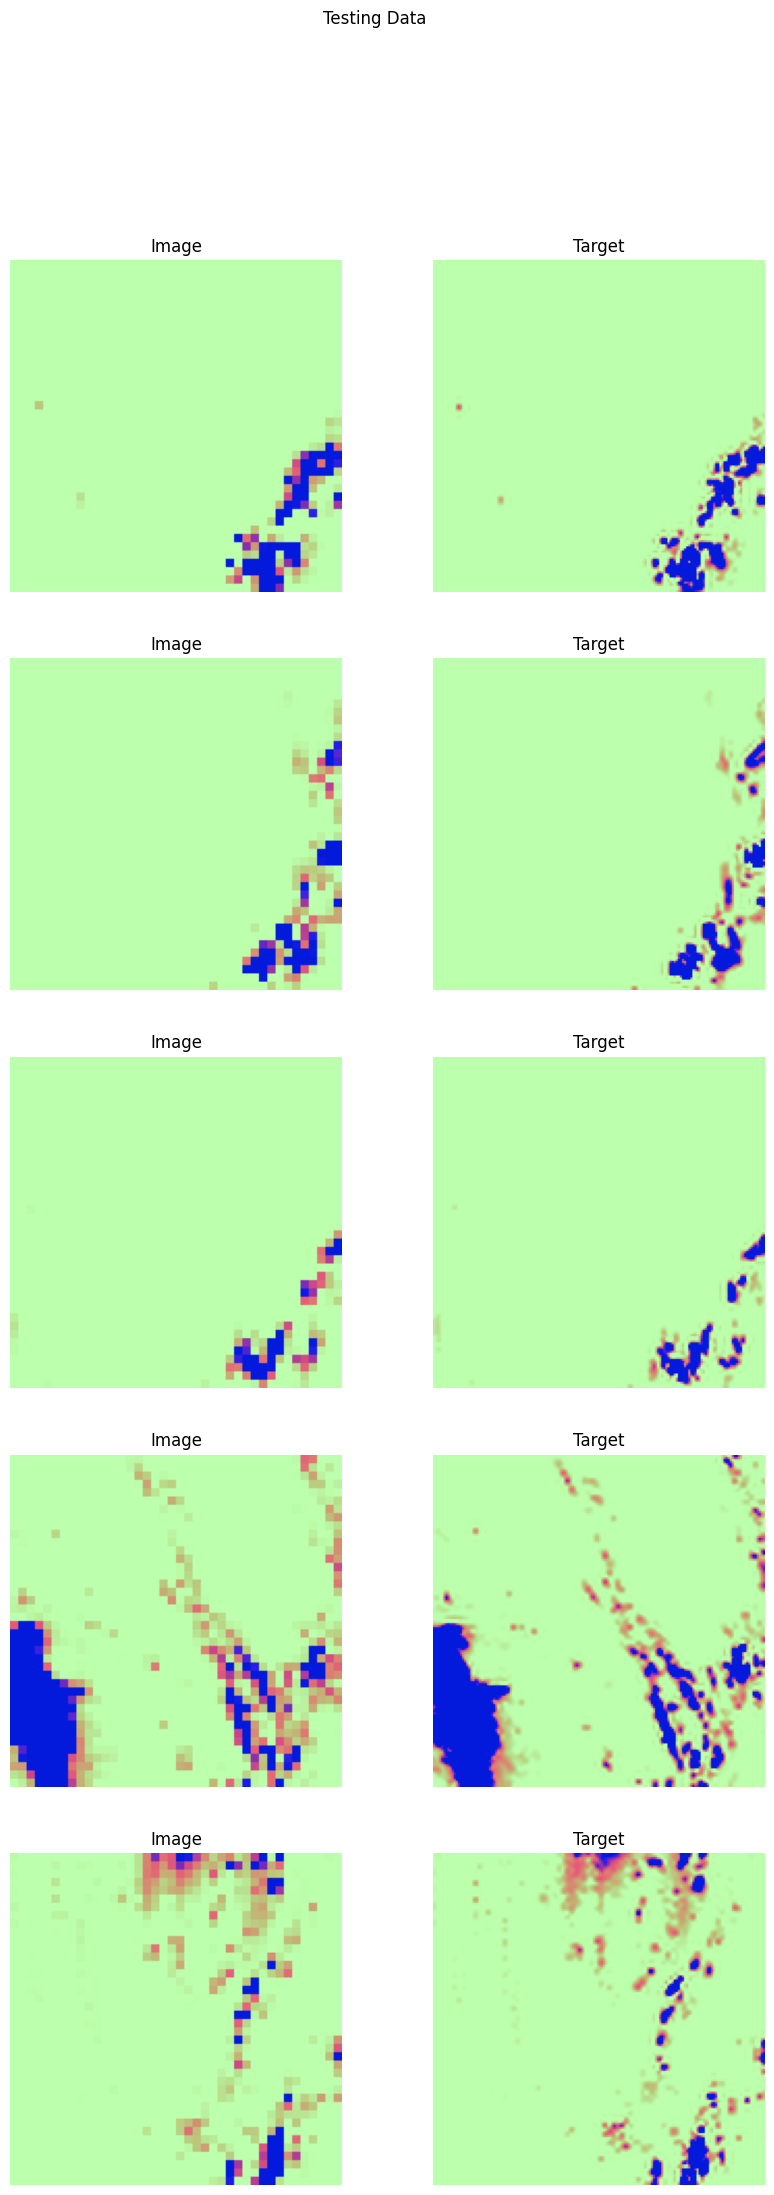

In [27]:
visualize_fold_data(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data\fold_2.pth', num_images=5)

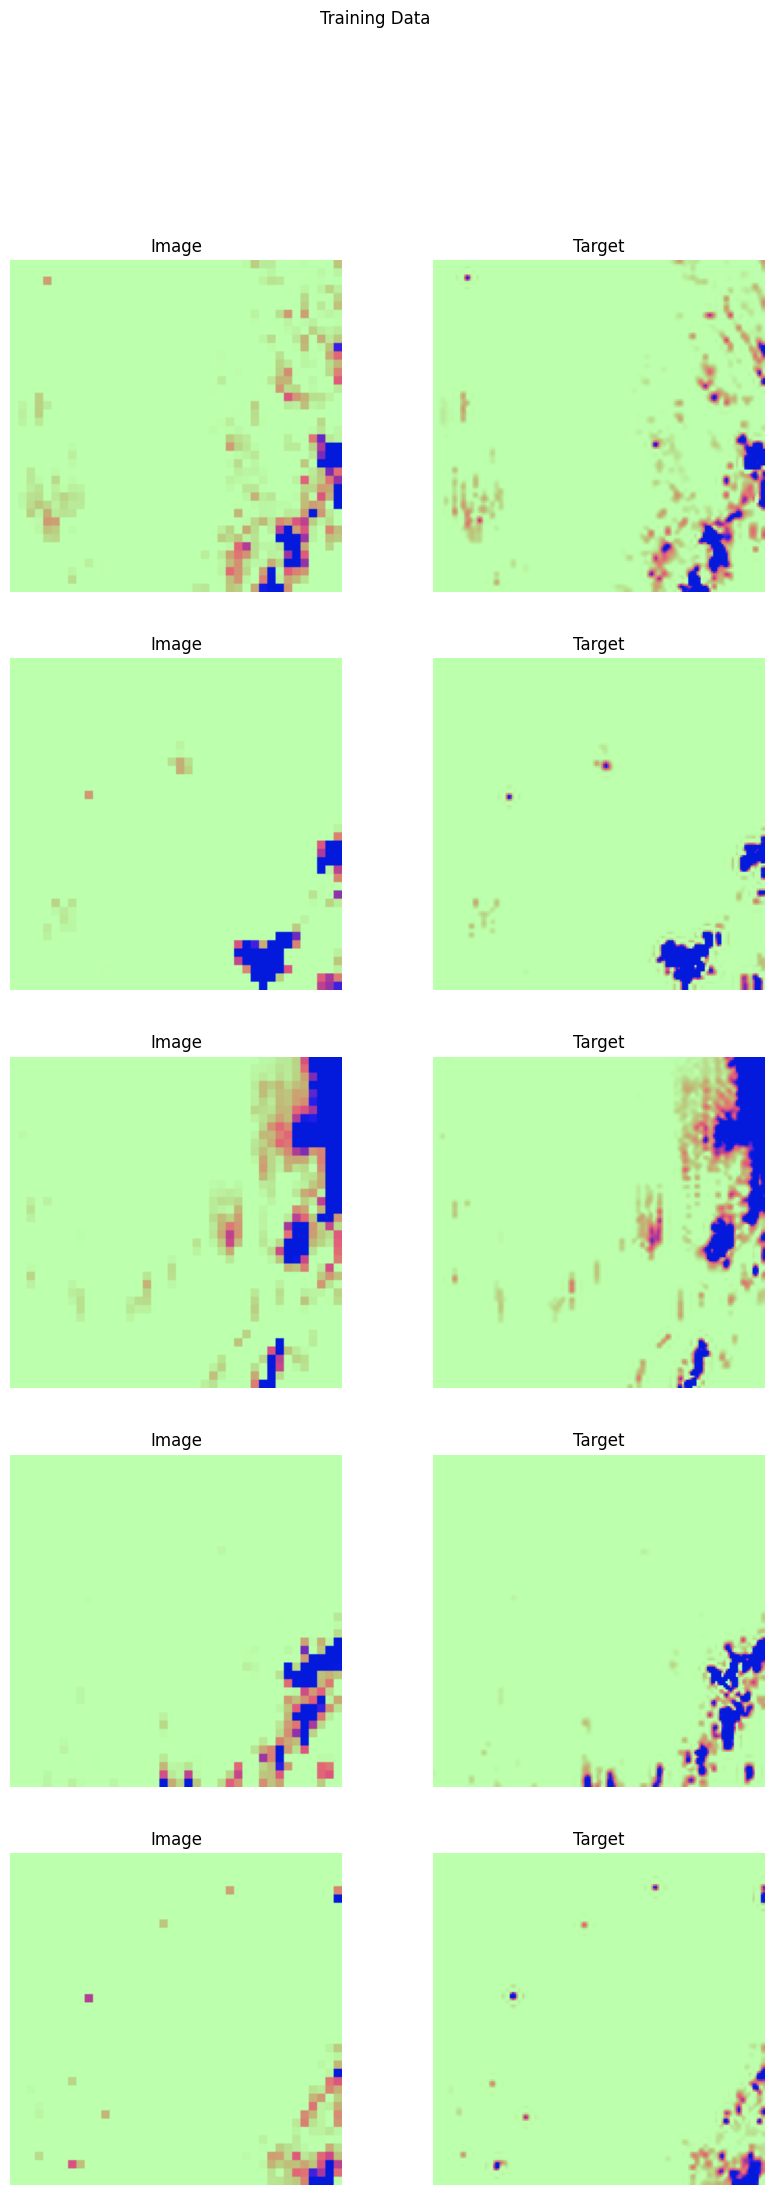

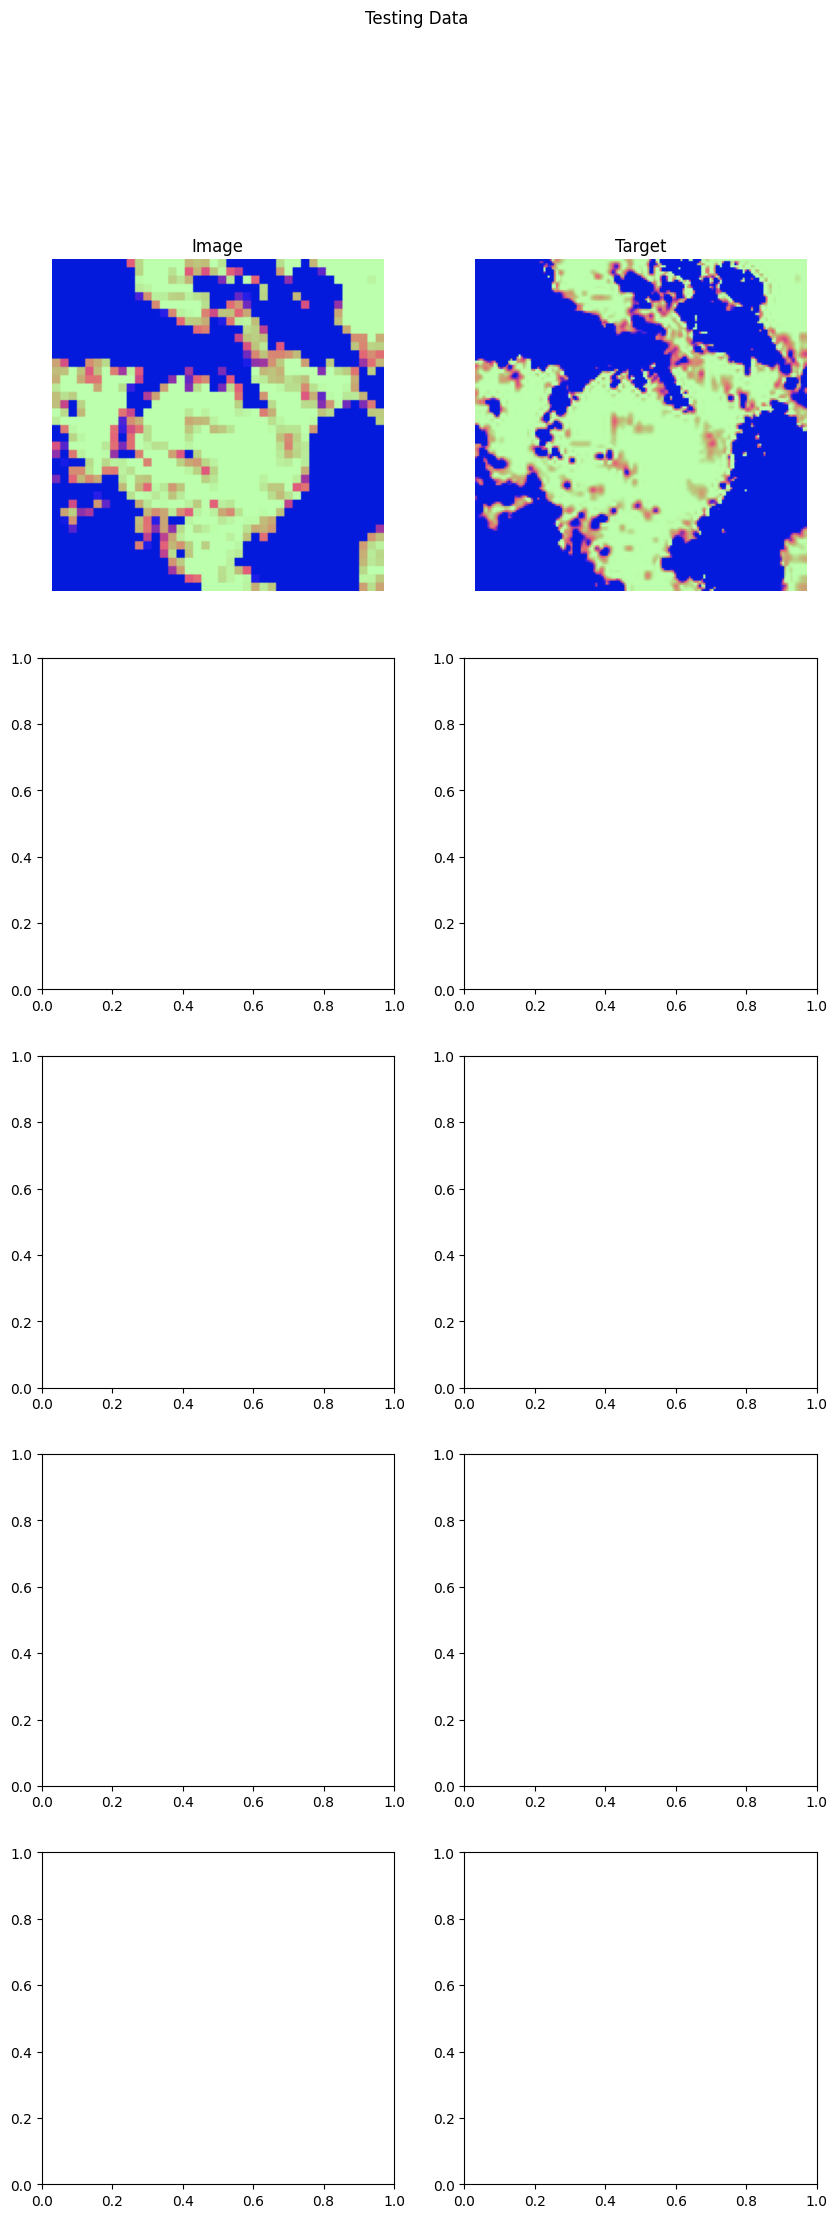

In [28]:
visualize_fold_data(r'F:\TANISHQ\loov\loov_369.pth', num_images=5)

In [ ]:
for fold in os.listdir(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data'):
    file=r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data'+'\\'+fold
    train,test=load_fold_data(file)
    ##trainin loop as usual 


    ##testing on the test data

    ##printing the results for the particualr fold(averaged over the entire fold)

##printing the results for the entire dataset(averaged over all the folds)